# Plot a zarr archive 
### and animate a selected variable

In [1]:
%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import anemoi.datasets as ad
import numpy as np
import matplotlib.animation as animation
from utils import mesh, interpolate, subset_variable, update_anim, simple_mesh_plot

#import sys # use to import functions from some other folder like the inference dir
#sys.path.append("/lustre/storeB/project/fou/hi/foccus/ina/ocean-ai/inference")

### Using anemoi-datasets to open and look at the data

In [ ]:
dir = '/lustre/storeB/project/fou/hi/foccus/datasets/prepro_norkyst_tests/'
file = dir + 'norkyst800_his_zdepth_2024_m00_AN_ml.zarr'
#file = dir + 'norkyst800_his_zdepth_2024_temp_m00_AN_ml.zarr'
zda = ad.open_dataset(file)

Select the variable and number of time steps

In [6]:
ntime = 12
var_name = 'temperature_1'
indx_var = zda.name_to_index[var_name]
var_norway = zda[:ntime,indx_var,0,:]

longitude = zda.longitudes
latitude = zda.latitudes

### Get a subset of the dataset 
Default: Lofoten & Vesterålen, Northern Norway

In [7]:
lon_min, lon_max = 11.83083, 15.59072
lat_min, lat_max = 67.41791, 69.20699

var, lat, lon = subset_variable(var_norway,latitude,longitude,lat_min,lat_max,lon_min,lon_max)
#del var_norway, longitude, latitude

The zarr data provides 1D arrays which are representing the 2D data. We use meshgrid and an interpolation to map the data back to 2D arrays. 

Note: Resolution of the grid eeds to be set. If it is too small the plotting/animation will be very slow. But you want to see small features too. Find a middle ground.

In [8]:
resolution=0.01 # TODO try smaller than 0.25, this is same as MEPS I think?
lat_grid, lon_grid = mesh(lat, lon, resolution)
# TODO: no need to call mesh here an also inside interpolate...

var_interp = np.empty([ntime,lat_grid.shape[0],lat_grid.shape[1]])
for itime in range(ntime):
    var_interp[itime] = interpolate(var[itime], lat, lon, resolution)

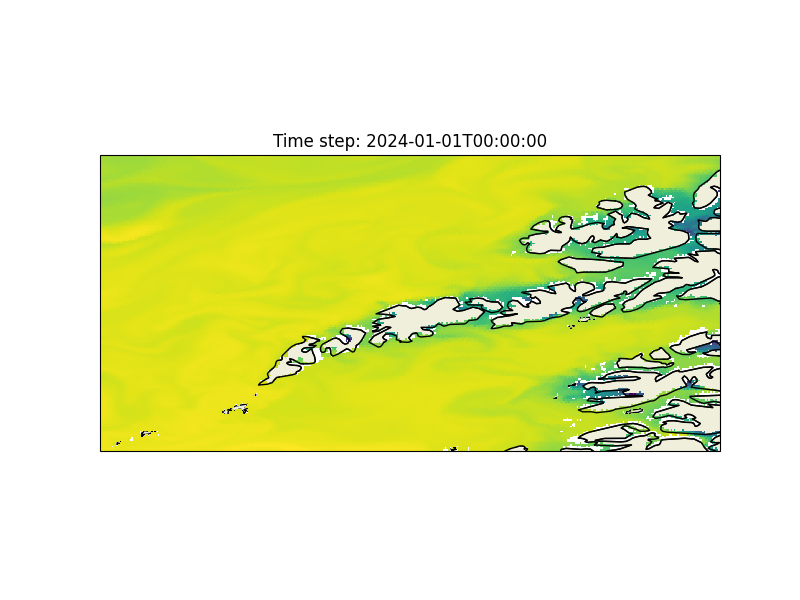

In [ ]:
time_steps = zda.dates
# Initialize the plot at t=0
fig, ax1, heatmap = simple_mesh_plot(var_interp[0],lat_grid,lon_grid,time_steps[0],var_name)

# Start the animation:
# set interval=500 for a slower anim
ani = animation.FuncAnimation(fig, update_anim, frames=ntime, interval=200,fargs=(ax1, heatmap, var_interp, time_steps))

Save the animation as a GIF (optional)

**NOTE:** only possible if the imagemagick package ia installed already

In [ ]:
#ani.save('zarr_animation.gif', writer='imagemagick')

Some other non-plotting things:
### Exploring the dataset using anemoi-datasets
Using various anemoi-datasets functions which are useful to know. 

In [ ]:
dates_all = zda.dates
type(dates_all)
time_diffs = np.diff(dates_all)
#print(time_diffs,len(dates_all))

# Check if all differences are the same
consistent_intervals = np.all(time_diffs == time_diffs[0])

print("All time intervals are consistent (have the same distance in time):", consistent_intervals)

In [ ]:
zda.variables

In [ ]:
# Data shap'en
# (24, 16, 1, 3153556) 
# tilsvarer i dette tilfellet: 24 tidssteg, 16 variables, 1 ensemble, ~3M gridpoints
zda.shape # samme som zda.data.shape

In [ ]:
# Print the methods of the dataset
dir(zda)

In [ ]:
zda.variables_metadata['temperature_1']
#zda.variables_metadata['zeta']

In [ ]:
# name_to_index will print all the variable names (16 of them) 
# and their indexes so we know how to access a variable by index
zda.name_to_index